In [1]:
# from sklearn import datasets
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt
from random import randint
import torch 
from util import *
from mmdetection.splits import get_unseen_class_ids, get_unseen_class_labels, get_class_labels
import seaborn as sns

colors = ['#8a2244', '#da8c22', '#c687d5', '#80d6f8', '#440f06', '#000075', '#000000', '#e6194B', '#f58231', '#ffe119', '#bfef45',
'#02a92c', '#3a3075', '#3dde43', '#baa980', '#170eb8', '#f032e6', '#a9a9a9', '#fabebe', '#ffd8b1', '#fffac8', '#aaffc3', '#aa22c3']

colors2 = ['#02a92c', '#3a3075', '#3dde43', '#baa980', '#170eb8', '#f032e6', '#a9a9a9', '#fabebe', '#ffd8b1', '#fffac8', '#aaffc3']


In [2]:
def tsne_plot_feats(f_feat, f_labels, path_save):
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    tsne = TSNE(n_components=2, random_state=0, verbose=True)
    syn_feature = np.load(f_feat)
    syn_label = np.load(f_labels)
    idx = np.arange(len(syn_label))
    idx = np.where(np.isin(syn_label, labels_to_plot))[0]
    print(labels_to_plot)
    idx = np.random.permutation(idx)[0:4000]
    X_sub = syn_feature[idx]
    y_sub = syn_label[idx]

    for i in range(len(labels_to_plot)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))

    print(X_sub.shape, y_sub.shape, labels_to_plot.shape)

    X_2d = tsne.fit_transform(X_sub)
    fig = plt.figure()

    for i, c in zip(labels_to_plot, colors):
        plt.scatter(X_2d[y_sub == i, 0], X_2d[y_sub == i, 1], c=c, label=id_to_class[i].title().replace('_', ' '))
    
    plt.axis('off')

    plt.legend(loc=(0.97, 0.00),fontsize=12,
           bbox_transform=plt.gcf().transFigure)
    fig.savefig(path_save, bbox_inches="tight")
    print(f"saved {path_save}")
    return X_sub, y_sub


In [4]:
def tsne_plot_feats_voc(f_feat, f_labels, path_save):

    dataset = 'voc'
    split = '65_15'

    labels_to_plot = np.array([17,  18,  19,  20])
    CLASSES = np.concatenate((['background'], get_class_labels(dataset, split=split)))

    id_to_class = {idx: class_label for idx, class_label in enumerate(CLASSES)}
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams["axes.linewidth"] = 1

    tsne = TSNE(n_components=2, random_state=0, verbose=True)
    syn_feature = np.load(f_feat)
    syn_label = np.load(f_labels)
    idx = np.arange(len(syn_label))
    idx = np.where(np.isin(syn_label, labels_to_plot))[0]
    print(labels_to_plot)
    idx = np.random.permutation(idx)[0:4000]
    X_sub = syn_feature[idx]
    y_sub = syn_label[idx]

    for i in range(len(labels_to_plot)):
        colors.append('#%06X' % randint(0, 0xFFFFFF))

    print(X_sub.shape, y_sub.shape, labels_to_plot.shape)

    X_2d = tsne.fit_transform(X_sub)
    fig = plt.figure()

    for i, c in zip(labels_to_plot, colors):
        plt.scatter(X_2d[y_sub == i, 0], X_2d[y_sub == i, 1], c=c, label=id_to_class[i].title().replace('_', ' '))
  

    plt.axis('off')
    
    plt.legend(loc=(0.9, 0.030),fontsize=12,
           bbox_transform=plt.gcf().transFigure)
    fig.savefig(path_save, bbox_inches="tight")
    print(f"saved {path_save}")
    return X_sub, y_sub


[17 18 19 20]
(4000, 1024) (4000,) (4,)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.107s...
[t-SNE] Computed neighbors for 4000 samples in 26.443s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 7.034203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.063171
[t-SNE] KL divergence after 1000 iterations: 1.598395
saved unseen_real_tsne.pdf
len of real feats: 4000
[17 18 19 20]
(1200, 1024) (1200,) (4,)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1200 samples in 0.025s...
[t-SNE] Computed neighbors for 1200 samples in 2.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1200
[t-SNE] Computed conditional probabilities for sample 1200 / 1200
[t-SNE] Mean sigma: 6.152377


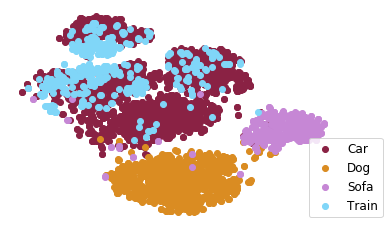

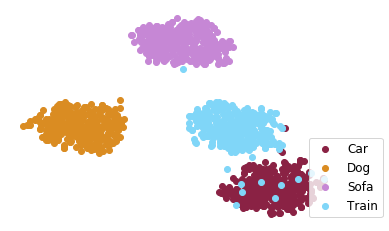

In [6]:
voc_real_f, voc_real_l = tsne_plot_feats_voc('../data/voc/testsubset_feats.npy' , '../data/voc/testsubset_labels.npy', 'unseen_real_tsne.pdf')
real_f, real_l = voc_real_f, voc_real_l
print(f"len of real feats: {len(real_f)}")
f_feat = f'tsne_plot_feats.npy'
f_labels = f'tsne_plot_labels.npy'
path_save = f'voc_unseen_eal_vs_syn.pdf'
syn_f, syn_l = tsne_plot_feats_voc(f_feat, f_labels, 'voc_unseen_syn.pdf')
print(f"len of syn feats: {len(syn_f)}")
labels_to_plot = np.array([17,  18,  19,  20])
CLASSES = np.concatenate((['background'], get_class_labels('voc', split='16_4')))
id_to_class = {idx: class_label for idx, class_label in enumerate(CLASSES)}

# merge and plot
feats_all = np.concatenate((syn_f, real_f))
label_all = np.concatenate((syn_l, real_l))
tsne = TSNE(n_components=2, random_state=0, verbose=True)
print(f"len of all feats: {len(feats_all)}")

voc_X_2d = tsne.fit_transform(feats_all)


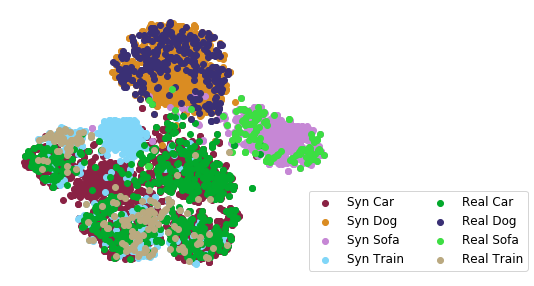

In [8]:

fig = plt.figure(figsize=(6, 5))
# for i, c1, c2 in zip(labels_to_plot, colors, colors2): indx = np.where(label_all == i)[0]; plt.scatter(X_2d[indx[indx<5000], 0], X_2d[indx[indx<5000], 1], c=c1, label=f"s_{id_to_class[i][:3]}");plt.scatter(X_2d[indx[indx>=5000], 0], X_2d[indx[indx>=5000], 1], c=c2, label=f"r_{id_to_class[i][:3]}")
for i, c1, c2 in zip(labels_to_plot, colors, colors2):
    indx = np.where(label_all == i)[0]
    plt.scatter(voc_X_2d[indx[indx<4000],   0], voc_X_2d[indx[indx<4000], 1], c=c1, label=f"Syn {id_to_class[i][:5].title().replace('_', ' ')}")
for i, c1, c2 in zip(labels_to_plot, colors, colors2):
    indx = np.where(label_all == i)[0]
    plt.scatter(voc_X_2d[indx[indx>=4000], 0], voc_X_2d[indx[indx>=4000], 1], c=c2, label=f"Real {id_to_class[i][:5].title().replace('_', ' ')}")
plt.axis('off')

plt.legend(loc=(0.9, 0.030),fontsize=12,
       bbox_transform=plt.gcf().transFigure, ncol=2)
fig.savefig(path_save, bbox_inches="tight")

[ 5 16 79 62  7 32 29 71 13 30 49 65 22 43 53]
(4000, 1024) (4000,) (15,)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.123s...
[t-SNE] Computed neighbors for 4000 samples in 26.525s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 5.428981
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.002182
[t-SNE] KL divergence after 1000 iterations: 1.526942
saved coco_unseen_real_tsne.pdf
len of real feats: 4000
[17 18 19 20]
(87, 1024) (87,) (4,)
[t-SNE] Computing 86 nearest neighbors...
[t-SNE] Indexed 87 samples in 0.000s...
[t-SNE] Computed neighbors for 87 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 87 / 87
[t-SNE] Mean sigma: 9.025998
[t-SNE] KL divergence after 250 iterati

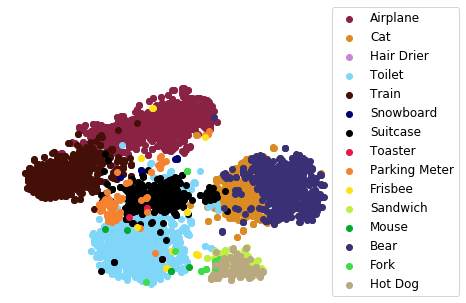

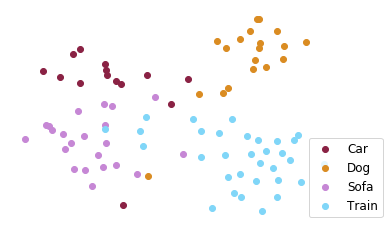

In [10]:

labels_to_plot = np.array([ 5, 16, 79, 62,  7, 32, 29, 71, 13, 30, 49, 65, 22, 43, 53])
CLASSES = np.concatenate((['background'], get_class_labels('coco', split='65_15')))
id_to_class = {idx: class_label for idx, class_label in enumerate(CLASSES)}

coco_real_f, coco_real_l = tsne_plot_feats('../data/coco/test_default_0.6_0.3_feats.npy' , '../data/coco/test_default_0.6_0.3_labels.npy', 'coco_unseen_real_tsne.pdf')
real_f, real_l = coco_real_f, coco_real_l

print(f"len of real feats: {len(real_f)}")
f_feat = f'tsne_plot_coco_feats.npy'
f_labels = f'tsne_plot_coco_labels.npy'
path_save = f'coco_unseen_eal_vs_syn.pdf'





[ 5 16 79 62  7 32 29 71 13 30 49 65 22 43 53]
(4000, 1024) (4000,) (15,)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.362s...
[t-SNE] Computed neighbors for 4000 samples in 27.281s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 4.577868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.800041
[t-SNE] KL divergence after 1000 iterations: 1.716062
saved coco_unseen_syn.pdf
len of syn feats: 4000
len of all feats: 8000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8000 samples in 0.387s...
[t-SNE] Computed neighbors for 8000 samples in 115.528s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8000
[t-SNE] Computed conditional probabilities for sample 2000 / 8000
[t-SNE] Comp

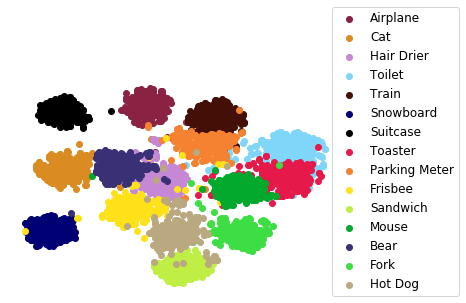

In [13]:
syn_f, syn_l = tsne_plot_feats('0_syn_feature.npy', '0_syn_label.npy', 'coco_unseen_syn.pdf')
print(f"len of syn feats: {len(syn_f)}")
feats_all = np.concatenate((syn_f, real_f))
label_all = np.concatenate((syn_l, real_l))
tsne = TSNE(n_components=2, random_state=0, verbose=True)
print(f"len of all feats: {len(feats_all)}")

coco_X_2d = tsne.fit_transform(feats_all)

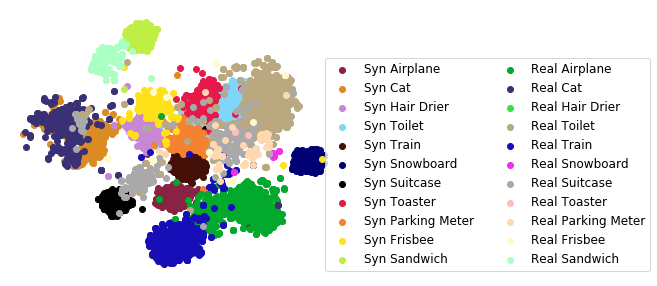

In [18]:
fig = plt.figure(figsize=(6, 5))
# for i, c1, c2 in zip(labels_to_plot, colors, colors2): indx = np.where(label_all == i)[0]; plt.scatter(X_2d[indx[indx<5000], 0], X_2d[indx[indx<5000], 1], c=c1, label=f"s_{id_to_class[i][:3]}");plt.scatter(X_2d[indx[indx>=5000], 0], X_2d[indx[indx>=5000], 1], c=c2, label=f"r_{id_to_class[i][:3]}")
for i, c1, c2 in zip(labels_to_plot, colors, colors2):
    indx = np.where(label_all == i)[0]
    plt.scatter(coco_X_2d[indx[indx<4000],   0], coco_X_2d[indx[indx<4000], 1], c=c1, label=f"Syn {id_to_class[i].title().replace('_', ' ')}")
for i, c1, c2 in zip(labels_to_plot, colors, colors2):
    indx = np.where(label_all == i)[0]
    plt.scatter(coco_X_2d[indx[indx>=4000], 0], coco_X_2d[indx[indx>=4000], 1], c=c2, label=f"Real {id_to_class[i].title().replace('_', ' ')}")
plt.axis('off')

plt.legend(loc=(0.95, 0.030),fontsize=12,
       bbox_transform=plt.gcf().transFigure, ncol=2)
# fig.savefig(path_save, bbox_inches="tight")
# plt.legend(loc=(0.9, 0.030),fontsize=12,
#        bbox_transform=plt.gcf().transFigure)
fig.savefig(path_save, bbox_inches="tight")